[View in Colaboratory](https://colab.research.google.com/github/big-data-bolivia-community/kaggle-nyc-taxi-trip-duration/blob/master/kaggle_nyc_taxi_trip_duration.ipynb)

In [0]:
#@title Default title text
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#data dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [0]:
%matplotlib inline 
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = [16,10]

In [0]:
#authenticate
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [6]:
train_download = drive.CreateFile({'id':'1UzauSLR8olyrcPnuMS2cFrighHuEiKqR'})
train_download.GetContentFile('train.csv')
test_download = drive.CreateFile({'id':'1i_MPuYG7xlZDyEHVbFccxEeRrHpiZzNx'})
test_download.GetContentFile('test.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.head(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124


In [7]:
df_test = df_train.sample(frac=30, replace=True)
df_test.head(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
757521,id2657518,2,2016-06-13 21:58:21,2016-06-13 22:06:07,1,-73.953110,40.782673,-73.954231,40.763901,N,466
71117,id1631291,2,2016-05-24 14:35:51,2016-05-24 14:45:36,6,-73.997192,40.742271,-74.008141,40.716953,N,585
1116821,id2314794,2,2016-04-12 17:48:58,2016-04-12 18:09:04,1,-73.958328,40.764740,-73.989113,40.763062,N,1206


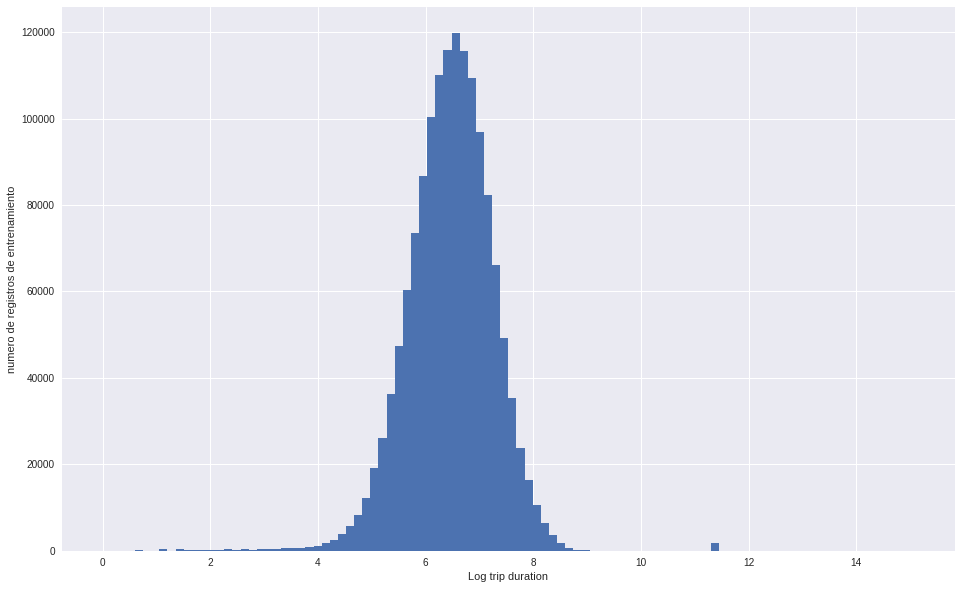

In [8]:
df_train['log_trip_duration'] = np.log((df_train['trip_duration'].values))
plt.hist(df_train['log_trip_duration'].values, bins=100)
plt.xlabel('Log trip duration')
plt.ylabel('numero de registros de entrenamiento')
plt.show()

In [9]:
df_train.head(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,log_trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,6.120297
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,6.496775
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,7.661056


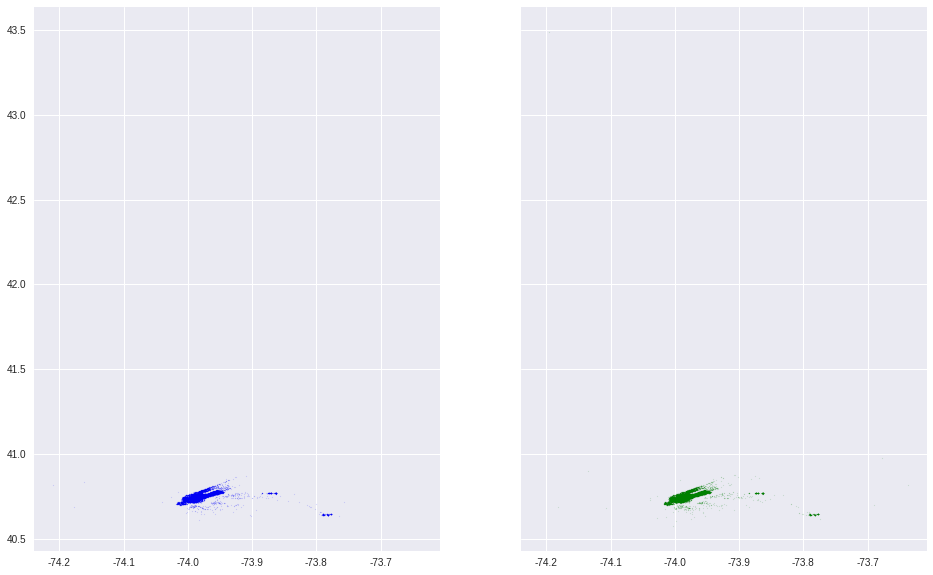

In [10]:
N = 10000
city_long_border = (-75, -75)
city_lat_border = (40,40)
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)

ax[0].scatter(df_train['pickup_longitude'].values[:N],
              df_train['pickup_latitude'].values[:N],
              color='blue', s=1, label='train', alpha=0.1)

ax[1].scatter(df_test['pickup_longitude'].values[:N],
              df_test['pickup_latitude'].values[:N],
              color='green', s=1, label='train', alpha=0.1)
  
plt.show()

In [11]:
features_names = list(df_train.columns)
print(features_names)

y = np.log(df_train['trip_duration'].values+1)

Xtr, Xtv, ytr, yv = train_test_split(df_train[features_names].values, y, test_size=0.2, random_state=1935)

model = xgb_train('default', df_train)



['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration', 'log_trip_duration']


NameError: ignored